

```
# 코드로 형식 지정됨
```



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#df=pd.read_csv('c:/data/mlb_pbp_2020.csv')
df = pd.read_csv("/content/drive/MyDrive/baseball_academy/mlb_pbp_2021.csv")
#head, tail
df.head()
#상위 5개 데이터만 확인

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,466,SL,2021-10-12,88.3,-0.55,5.82,"Pressly, Ryan",514917.0,519151.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,1.0,2021.0,0.53,-0.22,-0.09,2.05,NaN,NaN,544725.0,2.0,9.0,Bot,163.78,...,5.0,95.5,-21.0,88.2,2776.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.41,0.11,0.104,0.0,1.0,0.0,0.0,2.0,84.0,2.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,94.0,0.0,-0.183
1,1,502,CU,2021-10-12,82.2,-0.57,5.89,"Pressly, Ryan",514917.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,0.0,2021.0,1.55,-1.22,-0.61,2.68,NaN,NaN,544725.0,2.0,9.0,Bot,NaN,...,3.0,79.9,-38.0,81.3,3368.0,6.0,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,30.0,0.0,-0.041
2,2,529,CU,2021-10-12,83.1,-0.45,5.84,"Pressly, Ryan",544725.0,519151.0,force_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,2.0,2021.0,1.57,-0.94,0.30,2.28,NaN,NaN,650391.0,1.0,9.0,Bot,143.04,...,6.0,75.1,-20.0,82.4,3353.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.42,0.06,0.060,0.0,1.0,0.0,0.0,2.0,83.0,4.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.0,-0.238
3,3,561,SL,2021-10-12,91.0,-0.39,5.83,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,14.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,2.0,2021.0,0.59,-0.04,0.83,2.30,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,NaN,91.0,2779.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,3.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,118.0,0.0,0.000
4,4,578,CU,2021-10-12,83.6,-0.48,5.81,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,9.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,1.0,2021.0,1.28,-0.99,0.57,1.94,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,NaN,83.1,3274.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,2.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.0,-0.065


In [ ]:
#컬럼 목록 확인
df.columns

Index(['Unnamed: 0', 'index', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release

In [ ]:
#항목 고유값 모두 확인
df.events.unique()

array(['field_out', nan, 'force_out', 'strikeout', 'single', 'home_run',
       'walk', 'hit_by_pitch', 'field_error', 'sac_bunt', 'double',
       'grounded_into_double_play', 'sac_fly', 'fielders_choice_out',
       'double_play', 'triple', 'fielders_choice', 'caught_stealing_2b',
       'caught_stealing_home', 'strikeout_double_play', 'other_out',
       'pickoff_3b', 'catcher_interf', 'sac_fly_double_play',
       'caught_stealing_3b', 'wild_pitch', 'passed_ball',
       'stolen_base_2b', 'pickoff_2b', 'pickoff_1b',
       'sac_bunt_double_play', 'pickoff_caught_stealing_2b',
       'game_advisory', 'triple_play', 'pickoff_caught_stealing_3b'],
      dtype=object)

In [ ]:
#복수 테이블

df.groupby(['pitch_type','events'])['release_speed','release_spin_rate'].agg(['mean','min','max','count'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


release_speed        ... release_spin_rate      
                                          mean   min  ...               max count
pitch_type events                                     ...                        
CH         catcher_interf            86.840000  83.6  ...            1939.0     5
           caught_stealing_2b        87.093750  78.0  ...            2886.0    16
           caught_stealing_home      77.100000  77.1  ...            1856.0     1
           double                    84.573810  68.2  ...            2991.0   964
           double_play               85.225000  78.2  ...            2271.0    56
...                                        ...   ...  ...               ...   ...
SL         strikeout_double_play     85.251724  72.1  ...            3088.0    29
           triple                    84.015179  60.6  ...            2991.0   109
           triple_play               84.750000  84.5  ...            2399.0     2
           walk                      85.013838  52.9  ...            3388.0  2197
           wild_pitch                87.000000  83.3  ...            3059.0     3

[232 rows x 8 columns]

In [ ]:

#or  중 하나 만족하는 것, 류현진이거나 삼진이거나
df2 = df[(df['player_name']=='Hyun Jin Ryu') | (df['events']=='strikeout')]

#새로운 컬럼 생성하기 , 공격 팀
df2.loc[df2['inning_topbot']=='Top','Offense_Team']=df2.loc[df2['inning_topbot']=='Top','away_team']
df2.loc[df2['inning_topbot']=='Bot','Offense_Team']=df2.loc[df2['inning_topbot']=='Bot','home_team']




/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
#일부 구간 <행>
df.loc[0:3]

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,466,SL,2021-10-12,88.3,-0.55,5.82,"Pressly, Ryan",514917.0,519151.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,1.0,2021.0,0.53,-0.22,-0.09,2.05,NaN,NaN,544725.0,2.0,9.0,Bot,163.78,...,5.0,95.5,-21.0,88.2,2776.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.41,0.11,0.104,0.0,1.0,0.0,0.0,2.0,84.0,2.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,94.0,0.0,-0.183
1,1,502,CU,2021-10-12,82.2,-0.57,5.89,"Pressly, Ryan",514917.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,0.0,2021.0,1.55,-1.22,-0.61,2.68,NaN,NaN,544725.0,2.0,9.0,Bot,NaN,...,3.0,79.9,-38.0,81.3,3368.0,6.0,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,30.0,0.0,-0.041
2,2,529,CU,2021-10-12,83.1,-0.45,5.84,"Pressly, Ryan",544725.0,519151.0,force_out,hit_into_play,NaN,NaN,NaN,NaN,6.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,2.0,2021.0,1.57,-0.94,0.30,2.28,NaN,NaN,650391.0,1.0,9.0,Bot,143.04,...,6.0,75.1,-20.0,82.4,3353.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.42,0.06,0.060,0.0,1.0,0.0,0.0,2.0,83.0,4.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,35.0,0.0,-0.238
3,3,561,SL,2021-10-12,91.0,-0.39,5.83,"Pressly, Ryan",544725.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,14.0,"Leury Garcia grounds into a force out, second ...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,2.0,2021.0,0.59,-0.04,0.83,2.30,NaN,NaN,650391.0,1.0,9.0,Bot,NaN,...,NaN,NaN,NaN,91.0,2779.0,6.2,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,3.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,118.0,0.0,0.000


In [ ]:
df.iloc[[0,1,400]]

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,0,466,SL,2021-10-12,88.3,-0.55,5.82,"Pressly, Ryan",514917.0,519151.0,field_out,hit_into_play,NaN,NaN,NaN,NaN,8.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,X,4.0,ground_ball,0.0,1.0,2021.0,0.53,-0.22,-0.09,2.05,NaN,NaN,544725.0,2.0,9.0,Bot,163.78,...,5.0,95.5,-21.0,88.2,2776.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.41,0.11,0.104,0.0,1.0,0.0,0.0,2.0,84.0,2.0,Slider,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,94.0,0.0,-0.183
1,1,502,CU,2021-10-12,82.2,-0.57,5.89,"Pressly, Ryan",514917.0,519151.0,NaN,foul,NaN,NaN,NaN,NaN,4.0,"Cesar Hernandez grounds out, second baseman Jo...",D,L,R,CWS,HOU,S,NaN,NaN,0.0,0.0,2021.0,1.55,-1.22,-0.61,2.68,NaN,NaN,544725.0,2.0,9.0,Bot,NaN,...,3.0,79.9,-38.0,81.3,3368.0,6.0,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,1.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Infield shift,Standard,30.0,0.0,-0.041
400,400,779,SL,2021-10-12,86.5,-2.99,6.41,"Treinen, Blake",573131.0,595014.0,NaN,foul,NaN,NaN,NaN,NaN,14.0,Darin Ruf strikes out swinging.,D,R,R,LAD,SF,S,NaN,NaN,1.0,2.0,2021.0,1.22,-0.13,1.02,1.58,NaN,NaN,596103.0,2.0,7.0,Top,NaN,...,139.0,70.4,15.0,85.2,2596.0,5.5,660918.0,595014.0,669257.0,641856.0,607208.0,457759.0,608369.0,621035.0,641355.0,605141.0,55.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,4.0,Slider,5.0,1.0,1.0,5.0,1.0,5.0,1.0,5.0,Standard,Standard,40.0,0.0,0.000


In [ ]:

#특정 열을 골라 보기 
df['pitcher']

0         519151.0
1         519151.0
2         519151.0
3         519151.0
4         519151.0
            ...   
715110    608566.0
715111    608566.0
715112    608566.0
715113    608566.0
715114    608566.0
Name: pitcher, Length: 715115, dtype: float64

In [ ]:
#에러
#df['pitcher','batter']

TypeError: ignored

In [ ]:
#다양한 열
tt=df[['pitcher','batter','pitch_type']]
tt

,pitcher,batter,pitch_type
0,519151.0,514917.0,SL
1,519151.0,514917.0,CU
2,519151.0,544725.0,CU
3,519151.0,544725.0,SL
4,519151.0,544725.0,CU
...,...,...,...
715110,608566.0,605141.0,FF
715111,608566.0,605141.0,FF
715112,608566.0,605141.0,FF
715113,608566.0,605141.0,FF


In [ ]:
df.loc[:,['pitcher','batter','pitch_type']]

,pitcher,batter,pitch_type
0,519151.0,514917.0,SL
1,519151.0,514917.0,CU
2,519151.0,544725.0,CU
3,519151.0,544725.0,SL
4,519151.0,544725.0,CU
...,...,...,...
715110,608566.0,605141.0,FF
715111,608566.0,605141.0,FF
715112,608566.0,605141.0,FF
715113,608566.0,605141.0,FF


In [ ]:
df.iloc[:,[2,4,10]]

,pitch_type,release_speed,events
0,SL,88.3,field_out
1,CU,82.2,NaN
2,CU,83.1,force_out
3,SL,91.0,NaN
4,CU,83.6,NaN
...,...,...,...
715110,FF,95.9,NaN
715111,FF,95.4,NaN
715112,FF,96.1,NaN
715113,FF,95.6,NaN


In [ ]:
#다양한 행, 열 
len(df)

715115

In [ ]:
len(df.columns)

94

In [ ]:
df.shape

(715115, 94)

In [ ]:
df.iloc[[0,99,999], [0,3,89]]

,Unnamed: 0,game_date,if_fielding_alignment
0,0,2021-10-12,Infield shift
99,99,2021-10-12,Infield shift
999,999,2021-10-11,Infield shift


In [ ]:
df.loc[[0,99,999], ['batter','pitch_type']]

,batter,pitch_type
0,514917.0,SL
99,544725.0,FF
999,640457.0,SL


# and와 or
1. and - & 
2. or - |

In [ ]:
#김광현의 메이저리그에서 삼진의 구종별 구속 평균, 최고와 개수를 구하라
df[(df['pitcher']==547942) & (df['events']=='strikeout')].groupby('pitch_type')['release_speed'].agg(['mean','max','count'])

,mean,max,count
pitch_type,,,
CH,79.888889,81.5,9
CU,69.328571,70.4,7
FF,89.716667,91.7,12
SL,84.596154,88.3,52


In [ ]:
#and를 모두 만족하는 것, 류현진과 삼진을 포함하는 것
df2 = df[(df['player_name']=='Ryu, Hyun Jin') & (df['events']=='strikeout')]
df2

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
9033,9033,349,FC,2021-10-03,88.2,2.21,5.75,"Ryu, Hyun Jin",642162.0,547943.0,strikeout,called_strike,NaN,NaN,NaN,NaN,14.0,Pat Valaika called out on strikes.,R,R,L,TOR,BAL,S,2.0,NaN,1.0,2.0,2021.0,0.24,0.97,0.88,2.20,NaN,NaN,NaN,0.0,5.0,Top,NaN,...,NaN,NaN,NaN,88.4,2100.0,6.2,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,572816.0,543807.0,606192.0,54.25,NaN,NaN,0.0,1.0,0.0,0.0,NaN,43.0,5.0,Cutter,11.0,1.0,1.0,11.0,1.0,11.0,1.0,11.0,Standard,Standard,139.0,0.001,-0.173
9064,9064,543,CH,2021-10-03,82.4,2.42,5.53,"Ryu, Hyun Jin",642721.0,547943.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Kelvin Gutierrez strikes out swinging.,R,R,L,TOR,BAL,S,2.0,NaN,1.0,2.0,2021.0,1.20,-0.18,0.61,1.37,NaN,641820.0,600474.0,1.0,4.0,Top,NaN,...,NaN,NaN,NaN,82.7,1501.0,6.6,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,572816.0,543807.0,606192.0,53.89,NaN,NaN,0.0,1.0,0.0,0.0,NaN,35.0,4.0,Changeup,9.0,1.0,1.0,9.0,1.0,9.0,1.0,9.0,Standard,Standard,97.0,0.007,-0.348
9077,9077,943,CH,2021-10-03,80.6,2.24,5.72,"Ryu, Hyun Jin",669720.0,547943.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,14.0,Austin Hays strikes out swinging.,R,R,L,TOR,BAL,S,2.0,NaN,0.0,2.0,2021.0,1.05,0.56,1.53,1.57,NaN,NaN,NaN,0.0,4.0,Top,NaN,...,NaN,NaN,NaN,80.9,1540.0,6.5,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,572816.0,543807.0,606192.0,53.99,NaN,NaN,0.0,1.0,0.0,0.0,NaN,32.0,3.0,Changeup,9.0,1.0,1.0,9.0,1.0,9.0,1.0,9.0,Standard,Standard,112.0,0.003,-0.151
9144,9144,1708,FF,2021-10-03,92.7,2.03,5.84,"Ryu, Hyun Jin",600474.0,547943.0,strikeout,called_strike,NaN,NaN,NaN,NaN,7.0,Pedro Severino called out on strikes.,R,R,L,TOR,BAL,S,2.0,NaN,2.0,2.0,2021.0,1.27,1.08,-0.65,2.07,NaN,NaN,NaN,1.0,2.0,Top,NaN,...,NaN,NaN,NaN,92.4,2056.0,6.4,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,606192.0,543807.0,545341.0,54.12,NaN,NaN,0.0,1.0,0.0,0.0,NaN,13.0,5.0,4-Seam Fastball,3.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,Infield shift,Strategic,130.0,0.013,-0.142
9149,9149,2102,CU,2021-10-03,76.4,1.94,6.04,"Ryu, Hyun Jin",641820.0,547943.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,13.0,Trey Mancini strikes out swinging.,R,R,L,TOR,BAL,S,2.0,NaN,1.0,2.0,2021.0,-0.94,-1.17,-0.43,1.40,NaN,NaN,NaN,0.0,2.0,Top,NaN,...,NaN,NaN,NaN,76.0,2619.0,6.3,632235.0,547943.0,643376.0,665489.0,543760.0,669289.0,666182.0,606192.0,543807.0,545341.0,54.22,NaN,NaN,0.0,1.0,0.0,0.0,NaN,12.0,6.0,Curveball,3.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0,Standard,Strategic,322.0,0.020,-0.173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711972,711972,496,FC,2021-04-01,85.0,2.32,5.70,"Ryu, Hyun Jin",650402.0,547943.0,strikeout,called_strike,NaN,NaN,NaN,NaN,12.0,Gleyber Torres called out on strikes.,R,R,L,NYY,TOR,S,2.0,NaN,1.0,2.0,2021.0,0.00,0.46,0.94,2.55,NaN,NaN,NaN

In [ ]:
df2.loc[df2['inning_topbot']=='Top','away_team']

9033      BAL
9064      BAL
9077      BAL
9144      BAL
9149      BAL
         ... 
667320    NYY
667388    NYY
667391    NYY
667395    NYY
667407    NYY
Name: away_team, Length: 70, dtype: object

In [ ]:
#새로운 컬럼 생성하기 , 공격 팀
df2.loc[df2['inning_topbot']=='Top','Offense_Team'] = df2.loc[df2['inning_topbot']=='Top','away_team']
df2.loc[df2['inning_topbot']=='Bot','Offense_Team'] = df2.loc[df2['inning_topbot']=='Bot','home_team']
df2[['Offense_Team','inning_topbot','away_team','home_team']]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Offense_Team,inning_topbot,away_team,home_team
9033,BAL,Top,BAL,TOR
9064,BAL,Top,BAL,TOR
9077,BAL,Top,BAL,TOR
9144,BAL,Top,BAL,TOR
9149,BAL,Top,BAL,TOR
...,...,...,...,...
711972,NYY,Bot,TOR,NYY
711981,NYY,Bot,TOR,NYY
712037,NYY,Bot,TOR,NYY
712083,NYY,Bot,TOR,NYY


In [ ]:
#홈런일 때만 불리언으로
df.events=="home_run"
#홈런인 데이터만 뽑아내기
df[df.events=="home_run"]

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
20,20,386,FF,2021-10-12,98.7,-1.46,5.97,"Hendriks, Liam",514888.0,521230.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Jose Altuve homers (1) on a fly ball to left f...,D,R,R,CWS,HOU,X,NaN,fly_ball,0.0,0.0,2021.0,-0.25,1.59,-0.12,2.49,NaN,663656.0,676801.0,2.0,9.0,Top,20.85,...,416.0,110.0,27.0,100.0,2583.0,7.0,660926.0,521230.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.48,0.990,2.020,2.0,1.0,0.0,3.0,6.0,78.0,1.0,4-Seam Fastball,1.0,7.0,7.0,1.0,10.0,1.0,10.0,1.0,Standard,Standard,197.0,-0.002,2.653
305,305,338,KC,2021-10-12,84.0,-1.66,5.24,"McCullers Jr., Lance",657757.0,621121.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,4.0,Gavin Sheets homers (1) on a fly ball to cente...,D,L,R,CWS,HOU,X,NaN,fly_ball,0.0,1.0,2021.0,1.46,-0.42,-0.48,2.34,NaN,NaN,NaN,1.0,2.0,Bot,128.89,...,408.0,106.2,23.0,83.1,2911.0,5.7,660926.0,621121.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676694.0,663656.0,54.79,0.900,1.587,2.0,1.0,0.0,3.0,6.0,15.0,2.0,Knuckle Curve,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Infield shift,Standard,52.0,0.113,1.027
368,368,841,FF,2021-10-12,94.0,1.99,5.60,"McGee, Jake",669257.0,459429.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Will Smith homers (2) on a fly ball to center ...,D,R,L,LAD,SF,X,NaN,fly_ball,0.0,0.0,2021.0,0.99,1.35,0.05,2.66,NaN,NaN,608369.0,1.0,8.0,Bot,104.07,...,396.0,109.5,23.0,93.2,2030.0,6.1,660918.0,459429.0,457763.0,573131.0,456781.0,446334.0,543063.0,592178.0,596103.0,573262.0,54.41,0.970,1.836,2.0,1.0,0.0,3.0,6.0,73.0,1.0,4-Seam Fastball,5.0,2.0,5.0,2.0,2.0,7.0,7.0,2.0,Standard,Standard,128.0,0.020,1.730
506,506,287,FF,2021-10-12,93.3,2.16,5.80,"García, Jarlín",605141.0,606424.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,6.0,Mookie Betts homers (1) on a fly ball to right...,D,R,L,LAD,SF,X,NaN,fly_ball,0.0,1.0,2021.0,1.19,0.94,0.76,2.28,NaN,NaN,621111.0,0.0,4.0,Bot,181.61,...,388.0,102.0,25.0,93.6,2156.0,6.4,660918.0,606424.0,457763.0,573131.0,600303.0,446334.0,543063.0,664774.0,573262.0,592178.0,54.07,0.723,1.258,2.0,1.0,0.0,3.0,6.0,34.0,2.0,4-Seam Fastball,2.0,0.0,2.0,0.0,0.0,4.0,4.0,0.0,Standard,Standard,126.0,0.103,1.637
650,650,664,SL,2021-10-12,83.6,3.43,5.15,"Hader, Josh",518692.0,623352.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Freddie Freeman homers (1) on a fly ball to ce...,D,L,L,ATL,MIL,X,NaN,fly_ball,0.0,0.0,2021.0,-0.66,0.00,-0.21,2.62,NaN,NaN,NaN,2.0,8.0,Bot,88.56,...,428.0,105.9,32.0,83.8,2464.0,6.6,660914.0,623352.0,571912.0,642133.0,543939.0,649966.0,642715.0,592885.0,456715.0,541645.0,53.86,0.903,1.860,2.0,1.0,0.0,3.0,6.0,73.0,1.0,Slider,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,Infield shift,Standard,318.0,0.324,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714604,714604,3354,SI,2021-04-01,89.6,4.18,3.37,"Hill, Tim",641796.0,657612.0,h

In [ ]:
#여러개 조건을 만족 isin
df.events.isin(['single','double','triple','home_run'])

0         False
1         False
2         False
3         False
4         False
          ...  
715110    False
715111    False
715112    False
715113    False
715114    False
Name: events, Length: 715115, dtype: bool

In [ ]:
#안타를 모두 만족하는 데이터 뽑아내기
df[df.events.isin(['single','double','triple','home_run'])]

,Unnamed: 0,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,...,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
10,10,780,CU,2021-10-12,83.3,-0.30,5.93,"Pressly, Ryan",650391.0,519151.0,single,hit_into_play,NaN,NaN,NaN,NaN,14.0,Eloy Jimenez singles on a line drive to right ...,D,R,R,CWS,HOU,X,9.0,line_drive,1.0,2.0,2021.0,1.17,-0.98,0.37,1.11,NaN,NaN,NaN,0.0,9.0,Bot,162.21,...,269.0,97.6,14.0,82.6,3335.0,6.1,660926.0,519151.0,455117.0,493329.0,514888.0,608324.0,621043.0,488726.0,676801.0,663656.0,54.43,0.823,0.807,0.9,1.0,1.0,0.0,4.0,81.0,4.0,Curveball,1.0,10.0,1.0,10.0,10.0,1.0,1.0,10.0,Standard,Standard,26.0,0.001,0.471
18,18,336,CU,2021-10-12,88.0,-1.43,5.91,"Hendriks, Liam",488726.0,521230.0,single,hit_into_play,NaN,NaN,NaN,NaN,8.0,Michael Brantley singles on a sharp ground bal...,D,L,R,CWS,HOU,X,9.0,ground_ball,0.0,1.0,2021.0,0.02,-0.47,0.25,1.65,NaN,NaN,NaN,2.0,9.0,Top,169.54,...,86.0,101.3,5.0,89.5,2207.0,7.0,660926.0,521230.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.54,0.553,0.504,0.9,1.0,1.0,0.0,4.0,79.0,2.0,Curveball,1.0,10.0,10.0,1.0,10.0,1.0,10.0,1.0,Standard,Standard,29.0,0.000,0.139
20,20,386,FF,2021-10-12,98.7,-1.46,5.97,"Hendriks, Liam",514888.0,521230.0,home_run,hit_into_play,NaN,NaN,NaN,NaN,5.0,Jose Altuve homers (1) on a fly ball to left f...,D,R,R,CWS,HOU,X,NaN,fly_ball,0.0,0.0,2021.0,-0.25,1.59,-0.12,2.49,NaN,663656.0,676801.0,2.0,9.0,Top,20.85,...,416.0,110.0,27.0,100.0,2583.0,7.0,660926.0,521230.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.48,0.990,2.020,2.0,1.0,0.0,3.0,6.0,78.0,1.0,4-Seam Fastball,1.0,7.0,7.0,1.0,10.0,1.0,10.0,1.0,Standard,Standard,197.0,-0.002,2.653
37,37,904,FF,2021-10-12,97.8,-1.54,5.92,"Hendriks, Liam",493329.0,521230.0,single,hit_into_play,NaN,NaN,NaN,NaN,11.0,Yuli Gurriel singles on a fly ball to left fie...,D,R,R,CWS,HOU,X,7.0,fly_ball,0.0,0.0,2021.0,-0.49,1.49,-0.90,3.70,NaN,NaN,NaN,0.0,9.0,Top,102.96,...,254.0,72.6,28.0,98.9,2455.0,6.9,660926.0,521230.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.62,0.713,0.689,0.9,1.0,1.0,0.0,4.0,74.0,1.0,4-Seam Fastball,1.0,7.0,7.0,1.0,7.0,1.0,7.0,1.0,Standard,Standard,203.0,0.000,0.403
69,69,431,FF,2021-10-12,96.5,-3.21,4.82,"Kimbrel, Craig",488726.0,518886.0,single,hit_into_play,NaN,NaN,NaN,NaN,7.0,Michael Brantley singles on a sharp ground bal...,D,L,R,CWS,HOU,X,8.0,ground_ball,3.0,1.0,2021.0,-0.88,1.20,-0.36,2.11,514888.0,NaN,NaN,1.0,8.0,Top,130.93,...,4.0,104.4,-26.0,97.1,2398.0,6.6,660926.0,518886.0,518735.0,547989.0,514917.0,660162.0,641313.0,650391.0,641553.0,544725.0,53.85,0.120,0.117,0.9,1.0,1.0,0.0,2.0,66.0,5.0,4-Seam Fastball,1.0,6.0,6.0,1.0,7.0,1.0,7.0,1.0,Strategic,Standard,232.0,-0.004,0.472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715068,715068,1251,KC,2021-04-01,86.6,-1.94,6.21,"Márquez, Germán",477132.0,608566.0,singl

In [ ]:
import numpy as np
# ____.assign(새변수명 = np.where ( 조건  ,조건이 O일 때 값, 조건이 X일 때 값))

df=df.assign(hit=np.where(df.events=="home_run",1,0))
df.hit

0         0
1         0
2         0
3         0
4         0
         ..
715110    0
715111    0
715112    0
715113    0
715114    0
Name: hit, Length: 715115, dtype: int64

In [ ]:
df=df.assign(hit=np.where(df.events.isin(['single','double','triple','home_run']),1,0))   
sum(df.hit)

39787

In [ ]:
#'Offense_Team'이라는 파생 컬럼을 간편하게 만들 수도 있음 ()
df = df.assign(Offense_Team = np.where(df.inning_topbot == 'Top', df.away_team , df.home_team))


#과제풀이

In [ ]:


#과제1
df_1=df[(df['pitcher']==669456) & (df['description']=='swinging_strike')]
df_1.groupby('pitch_type')['release_speed'].agg(['mean','min','max','count'])

#과제2
df_=df[ (df['batter']==596847) & (df['bb_type'].isin(['popup','line_drive','ground_ball','fly_ball'])) ]
df_['launch_speed'].mean()
df_['launch_angle'].mean()

#과제3
df_ = df[df['events'].isin(['single','double','triple','home_run'])]
df_.groupby('events')['launch_speed','launch_angle'].mean()

#과제4
df.groupby('bb_type')['launch_speed','launch_angle'].agg(['mean'])

#과제5
df = df.assign(Offense_Team = np.where(df.inning_topbot == 'Bottom', df.home_team , df.away_team))
df = df.assign(Defense_Team = np.where(df.inning_topbot == 'Top', df.home_team , df.away_team))


df=df[df['description']!='foul']
df_off=df.groupby(['Offense_Team'])['launch_speed','launch_angle'].agg(['mean'])
df_def=df.groupby(['Defense_Team'])['launch_speed','launch_angle'].agg(['mean'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [ ]:
#단위 변환 
#1마일 = 1.60934km/h
df_5=df[df['description']!='foul']
df_5=df_5.groupby('Offense_Team')['launch_speed','launch_angle'].mean()

df_5['launch_speed'] = df_5['launch_speed']*1.60934

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


#시각화

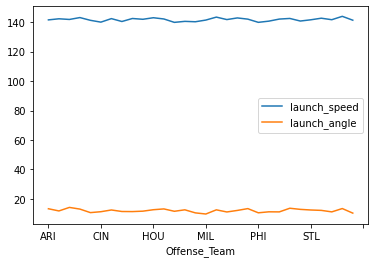

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#그래프를 그리시오 plot()만 있으면 자동으로 꺽은선
df_5.plot()


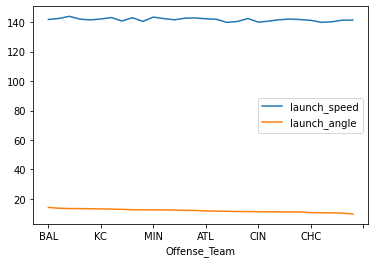

In [ ]:

#sort 정렬 (기본 : 오름차순)
df_5.sort_values('launch_speed')

#sort 2개 기준 정렬 (기본 : 오름차순)
df_5.sort_values(['launch_speed','launch_angle'])

#ascending=True -> 오름차순, False 내림차순
df_5 = df_5.sort_values(['launch_angle','launch_speed'],ascending=False)
df_5.plot()



<Figure size 300x300 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_

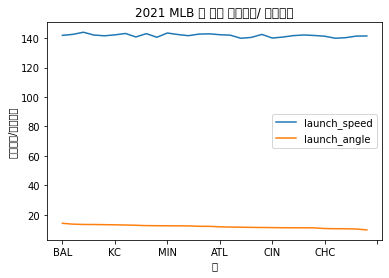

In [ ]:
#아래 두줄을 실행안하면 네모 박스만 뜬다 (한글화 패치 개념)
plt.rc('font', family='malgun gothic')
plt.figure(dpi=100, figsize=(3,3))  #해상도와 사이즈

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

df_5.plot()
#title 제목, xlabel x축, ylabel y축
plt.title('2021 MLB 팀 공격 타구속도/ 발사각도')  #제목
plt.xlabel('팀')                    #x축 이름
plt.ylabel('타구속도/발사각도')      #y축 이름
plt.show()                          #그래프를 보여라

<Figure size 300x300 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_

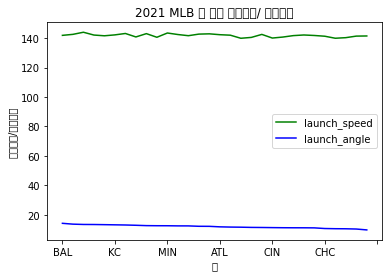

In [ ]:

#그래프 색 추가
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

plt.figure(dpi=100, figsize=(3,3))
matplotlib.rcParams['axes.unicode_minus'] = False


df_5.plot(color=['green','blue'])       #색추가
plt.title('2021 MLB 팀 공격 타구속도/ 발사각도')
plt.xlabel('팀')
plt.ylabel('타구속도/발사각도')
plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

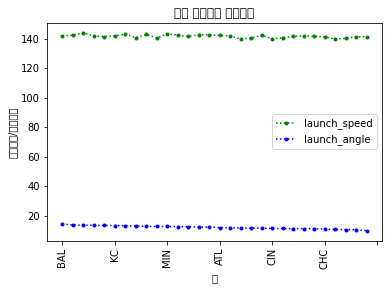

In [ ]:

#linestyle : --, :     /   marker : o, ., x, *, +, D, d
df_5.plot(color=['green','blue'],linestyle=':',marker='.')  
plt.title('팀별 타구속도 발사각도')
plt.xlabel('팀')
plt.ylabel('타구속도/발사각도')
plt.xticks(rotation=90)               #x축 회전
plt.show()



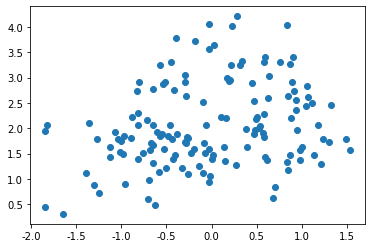

In [ ]:

#산점도
plt.scatter(df2.plate_x, df2.plate_z)

Text(0.5, 1.0, '류현진 삼진아웃')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_

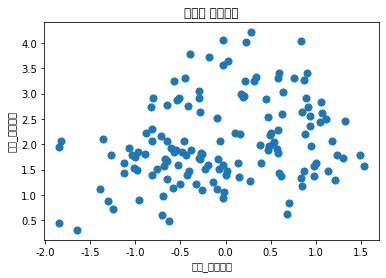

In [ ]:

#스트라이크존 그리기 1
#산점도, 사이즈
plt.scatter(df2.plate_x, df2.plate_z, s=50)
plt.xlabel('좌우_로케이션')
plt.ylabel('상하_로케이션')
plt.title('류현진 삼진아웃')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_

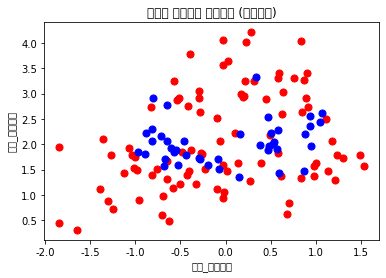

In [ ]:

#스트라이크존 그리기 2

S = df2.loc[(df2.description == 'swinging_strike') | (df2.description == 'swinging_strike_blocked')]  #헛스윙
B = df2.loc[df2.description == 'called_strike']  #스트라이크 콜

plt.scatter(S.plate_x, S.plate_z, s=50, color='red',  label='헛스윙')
plt.scatter(B.plate_x, B.plate_z, s=50, color='blue',  label='콜스트라이크')
plt.xlabel('좌우_로케이션')
plt.ylabel('상하_로케이션')
plt.title('류현진 삼진아웃 로케이션 (포수시점)')

ax = plt.gca()

plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_

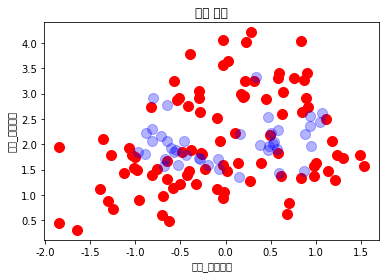

In [ ]:


#스트라이크존 그리기 3

S = df2.loc[(df2.description == 'swinging_strike') | (df2.description == 'swinging_strike_blocked')]  #헛스윙
B = df2.loc[df2.description == 'called_strike']  #스트라이크 콜

plt.scatter(S.plate_x, S.plate_z, s=100, color='red',  label='헛스윙')
plt.scatter(B.plate_x, B.plate_z, s=100, color='blue', alpha=0.3, label='콜스트라이크')
plt.xlabel('좌우_로케이션')
plt.ylabel('상하_로케이션')
plt.title('볼도 추가')

ax = plt.gca()

plt.show()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

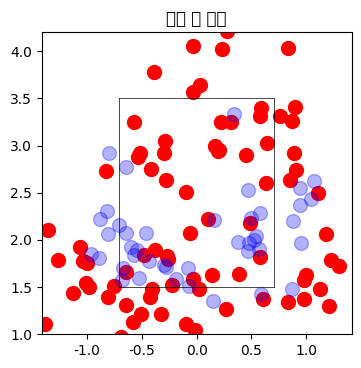

In [ ]:

#가상의 스트라이크 존 그리기
#좌우 너비는 총 17인치 ->  17/2 = 8.5 인치
# 8.5인치 = 0.708333피트
#상하는 1.5피트~3.5피트라고 가정
L, R = -0.708333, +0.708333
Bot, Top = 1.5, 3.5

plt.figure(figsize=(4,4), dpi=100)

plt.plot([L, L], [Bot, Top], c='black', lw=0.5)
plt.plot([R, R], [Bot, Top], c='black', lw=0.5)
plt.plot([L, R], [Bot, Bot], c='black', lw=0.5)
plt.plot([L, R], [Top, Top], c='black', lw=0.5)

plt.scatter(S.plate_x, S.plate_z, s=100, color='red',  label='헛스윙')
plt.scatter(B.plate_x, B.plate_z, s=100, color='blue', alpha=0.3, label='콜스트라이크')
plt.xlim([L*2, R*2])
plt.ylim([Bot/1.5, Top*1.2])

plt.title('사각 존 그리')
plt.show()
plt.close()


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50864 missing from current font.
  font.set_

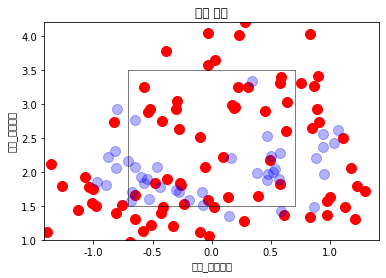

In [ ]:

#스트라이크존 그리기 4

S = df2.loc[(df2.description == 'swinging_strike') | (df2.description == 'swinging_strike_blocked')]  #헛스윙
B = df2.loc[df2.description == 'called_strike']  #스트라이크 콜

plt.scatter(S.plate_x, S.plate_z, s=100, color='red', label='헛스윙')
plt.scatter(B.plate_x, B.plate_z, s=100, color='blue', alpha=0.3, label='콜스트라이크')
plt.xlabel('좌우_로케이션')
plt.ylabel('상하_로케이션')
plt.title('볼도 추가')

plt.plot([L, L], [Bot, Top], c='black', lw=0.5)
plt.plot([R, R], [Bot, Top], c='black', lw=0.5)
plt.plot([L, R], [Bot, Bot], c='black', lw=0.5)
plt.plot([L, R], [Top, Top], c='black', lw=0.5)

plt.xlim([L*2, R*2])
plt.ylim([Bot/1.5, Top*1.2])

ax = plt.gca()

plt.show()

#엑셀데이텨 합치기

In [ ]:

import pandas as pd
#pd.read_csv('경로/파일.csv')
#pd.read_excel('경로/파일.xlsx')

df1=pd.read_csv('c:/data/each/458681_data.csv')
df2=pd.read_csv('c:/data/each/608337_data.csv')
df3=pd.read_csv('c:/data/each/608566_data.csv')
df4=pd.read_csv('c:/data/each/669456_data.csv')
#append (행을 아래로 붙이기)
df1
df2

#행 붙여서 덮어쓰기
df2=df1.append(df2)
df3=df2.append(df3)
df4=df3.append(df4)

In [ ]:

import os

folder='c:/data/each/' #위치 설정
os.listdir(folder) #위치 내 파일 리스트 형식

subdir_names=os.listdir(folder) #저장


for file_name in subdir_names:
    df1=pd.read_csv(folder+file_name)

#계속 df1에만 저장됨
for file_name in subdir_names:
    df1=pd.read_csv(folder+file_name)


#빈 데이터프레임 만들기
df=pd.DataFrame()
df

folder='c:/data/each/'
#모두 df에 누적시키기
for file_name in subdir_names:
    df1=pd.read_csv(folder+file_name)
    df=df.append(df1)
df


In [ ]:

#사용자 정의 함수 
#그러나 반응하지 않는다
def file_plus(folder):        
    subdir_names=os.listdir(folder) #저장
    df=pd.DataFrame()
    #모두 df에 누적시키기
    for file_name in subdir_names:
        df1=pd.read_csv(folder+file_name)
        df=df.append(df1)
    

df=file_plus('c:/data/each/')
df


In [ ]:

#return 마지막으로 노출해야되는 것
def file_plus(folder):        
    subdir_names=os.listdir(folder) #저장
    df=pd.DataFrame()
    #모두 df에 누적시키기
    for file_name in subdir_names:
        df1=pd.read_csv(folder+file_name)
        df=df.append(df1)
    return df

#값만 나타내려면    
file_plus('c:/data/each4/') 

#저장 하려면
df=file_plus('c:/data/each/')
df


#데이터 다운로드 (자동 크롤링)


In [1]:
!pip install baseball_scraper    
from baseball_scraper import statcast
data = statcast(start_dt='2020-01-01', end_dt='2020-12-31')



df=statcast(start_dt='2021-03-01', end_dt='2021-10-31')
len(df)

df=df[df['game_type']=="R"]
len(df)

statcast(start_dt='2020-07-24', end_dt='2020-11-27')


     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 958 kB 45.5 MB/s 
     |████████████████████████████████| 138 kB 56.1 MB/s 
     |████████████████████████████████| 356 kB 60.6 MB/s 
     |████████████████████████████████| 138 kB 56.2 MB/s 
     |████████████████████████████████| 138 kB 60.8 MB/s 
     |████████████████████████████████| 153 kB 53.9 MB/s 
     |████████████████████████████████| 137 kB 32.2 MB/s 
     |████████████████████████████████| 136 kB 46.9 MB/s 
     |████████████████████████████████| 136 kB 48.7 MB/s 
     |████████████████████████████████| 136 kB 45.7 MB/s 
INFO: pip is looking at multiple versions of urllib3 to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 127 kB 57.7 MB/s 
     |████████████████████████████████| 127 kB 43.3 MB/s 
     |████████████████████████████████| 126 kB 49.3 MB/s 
     |████████████████████████████████| 125 k

ModuleNotFoundError: ignored

In [ ]:
PlayerId=pd.read_csv('c:/data/master.csv',encoding='ISO-8859-1')
PlayerId.columns

#ID
PlayerId['batter']=PlayerId['mlb_id']

#merge -> 옆으로 붙임 
#이너조인, 아우터조인, 레프트조인, 라이트조인
df=pd.merge(df,PlayerId,on='batter',how='left')

#새 칼럼 만들기 assign 
#마일 피트 인치 

#np.where



#소팅 (오름차순, 내림차순)

#시각화 입문


NameError: ignored

In [ ]:

'''
과제 6은 하루만에 할 수 없으니 미리 나눠서 하셔야됩니다! 

과제1~4: 월요일까지
과제5~6: 수요일까지
과제7  : 목요일까지
괴제8  : 금요일까지


과제1 : 류현진 선수의(전체공) 로케이션을 스트라이크/볼 로 시각화
    

과제2 : 류현진 선수의 무브먼트(pfx,pfz)를 투수 시점에서 구종별로 시각화, 그리고 구종별로 평균값과 최대값을 구하시오
  *좌우 반전은 -1을 곱하면 됨
    
과제3 : 좋아하는 선수의 릴리즈 포인트를 구종별로 시각화

과제4 : 아래 참고 페이지를 활용하여 시각화 적용을 1개 이상하라
#참고 :  https://wikidocs.net/92071

과제5 : 지도학습, 비지도학습 / 딥러닝, 머신러닝, 인공지능 차이를 정리
           (지도학습과 비지도 학습은 영상으로 학습하길 권합니다.)

과제6 : 트레킹 데이터를 기간으로 가능한 수집하여 연도별로 나눈 뒤 저장하라 
 * .to_csv()
 
과제 7 : 야구규칙 책을 참고하여 스트라이크 존 규격을 정의하고, 스트라이크 존 안/밖에 있을 때의 스트라이크/볼 공의 개수를 구하라

과제 8 : 자유분석 리포트 제출  (ex 20-21시즌 변화, 시각화 등등 자유)
 
 
'''
